In [1]:
import numpy as np
import pandas as pd 
import lda
import sklearn

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thinkpad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Thinkpad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thinkpad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df=pd.read_csv("data/reviews.csv")

In [3]:
df

,Review,label,confidence
0,saya tidak menemukan menu lanjutan untuk perpa...,Neutral,0.999639
1,harusnya proses itu setelah data dikirim baru ...,Negative,0.988940
2,sangat bagus dan proses nya cepat,Positive,0.999757
3,ini aplikasinya kenapa sihkok mau buat sim bar...,Negative,0.994384
4,aplikasi payah duit sudah dibayar tapi muncul ...,Negative,0.999813
...,...,...,...
33258,mantaps,Positive,0.999678
33259,lanjut perpanjangan sim secara manual lewat on...,Neutral,0.998676
33260,kenapa katanya layanan belum tersedia ada masa...,Negative,0.987648
33261,bagus beberapa kali buat lancar,Positive,0.999573


# Distribusi Sentimen

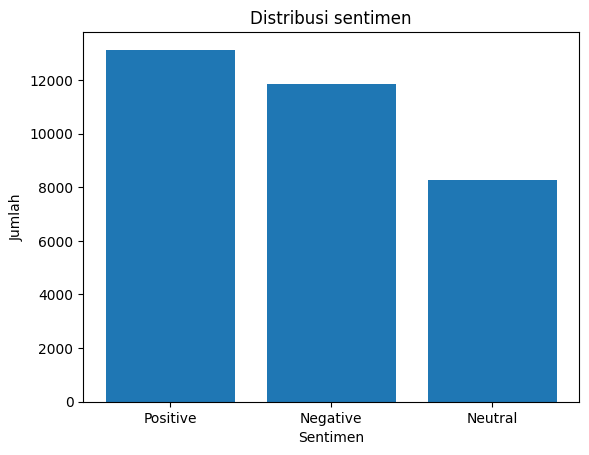

In [4]:
import matplotlib.pyplot as plt
import numpy as np
sentimen_count = df['label'].value_counts()

plt.bar(sentimen_count.index, sentimen_count.values)
plt.title('Distribusi sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [5]:
#world clous sentimen positif
from wordcloud import WordCloud
import matplotlib.pyplot as plt


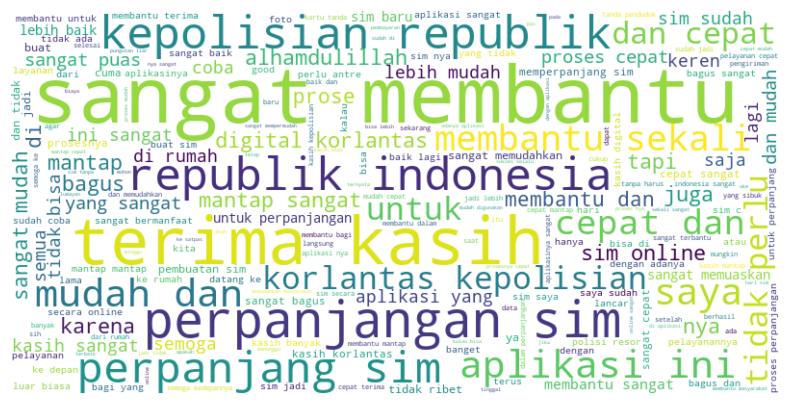

In [6]:
# Bersihkan data: hilangkan NaN dan pastikan semua Review berupa string
text = ' '.join(df[df['label'] == 'Positive']['Review'].dropna().astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan hasilnya
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


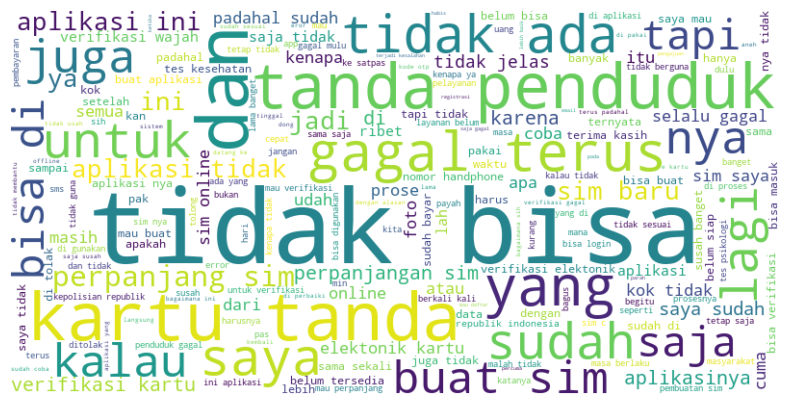

In [7]:
# Bersihkan data: hilangkan NaN dan pastikan semua Review berupa string
text = ' '.join(df[df['label'] == 'Negative']['Review'].dropna().astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan hasilnya
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

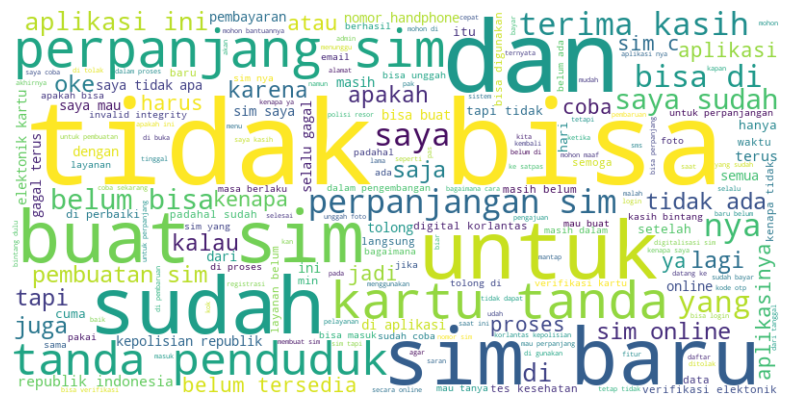

In [8]:
# Bersihkan data: hilangkan NaN dan pastikan semua Review berupa string
text = ' '.join(df[df['label'] == 'Neutral']['Review'].dropna().astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan hasilnya
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
df_negatif = df[df['label']=='Negative']

In [10]:
df_negatif = df_negatif.rename(columns={'Review' : 'review'})

In [11]:
df_negatif['review'] = df_negatif['review'].dropna()

In [12]:
# Filter data negatif
# df_negatif = df[df['label'] == 'Negative']

# Cek jumlah data sebelum dan sesudah penghapusan duplikat
jumlah_awal = len(df_negatif)
df_negatif_nodup = df_negatif.drop_duplicates(subset='review')
jumlah_setelah = len(df_negatif_nodup)

jumlah_duplikat = jumlah_awal - jumlah_setelah
jumlah_awal, jumlah_setelah, jumlah_duplikat


(11856, 11382, 474)

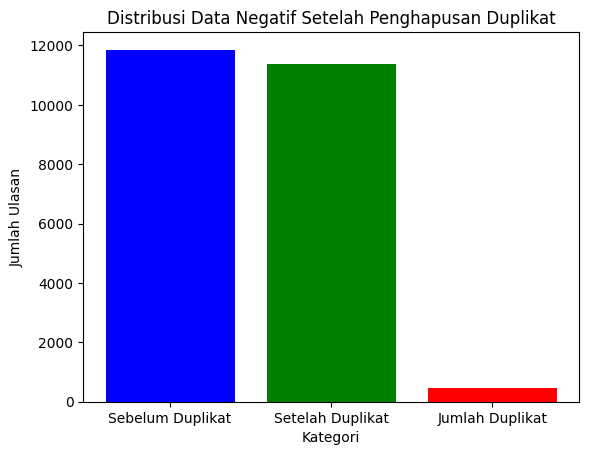

In [13]:
jumlah_data = [jumlah_awal, jumlah_setelah, jumlah_duplikat]
label_data = ['Sebelum Duplikat', 'Setelah Duplikat', 'Jumlah Duplikat']

plt.bar(label_data, jumlah_data, color=['blue', 'green', 'red'])
plt.title('Distribusi Data Negatif Setelah Penghapusan Duplikat')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Ulasan')
plt.show()

In [14]:
df_negatif_nodup = df_negatif.drop_duplicates(subset='review')

In [15]:
df_negatif_nodup

,review,label,confidence
1,harusnya proses itu setelah data dikirim baru ...,Negative,0.988940
3,ini aplikasinya kenapa sihkok mau buat sim bar...,Negative,0.994384
4,aplikasi payah duit sudah dibayar tapi muncul ...,Negative,0.999813
9,verifikasi gagal,Negative,0.999831
10,sampah,Negative,0.999882
...,...,...,...
33252,pada saat daftar tes psikotes gagal terus nik ...,Negative,0.866586
33255,banyak yang masih pengembangan tidak tersedia ...,Negative,0.860257
33256,aplikasinya butut orang mau login saja di pers...,Negative,0.999857
33257,verifikasi nomor telepon untuk masuk kok susah...,Negative,0.999558


Data Cleaning

In [16]:
import re
#menghapus tanda baca
def hapus_tandabaca(text):
    text = re.sub(r'[^\w\s]', ' ', text)
    return text

df_negatif_nodup['hapus_tandabaca'] = df_negatif_nodup['review'].apply(hapus_tandabaca)
df_negatif_nodup

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_1484\2370089010.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatif_nodup['hapus_tandabaca'] = df_negatif_nodup['review'].apply(hapus_tandabaca)


,review,label,confidence,hapus_tandabaca
1,harusnya proses itu setelah data dikirim baru ...,Negative,0.988940,harusnya proses itu setelah data dikirim baru ...
3,ini aplikasinya kenapa sihkok mau buat sim bar...,Negative,0.994384,ini aplikasinya kenapa sihkok mau buat sim bar...
4,aplikasi payah duit sudah dibayar tapi muncul ...,Negative,0.999813,aplikasi payah duit sudah dibayar tapi muncul ...
9,verifikasi gagal,Negative,0.999831,verifikasi gagal
10,sampah,Negative,0.999882,sampah
...,...,...,...,...
33252,pada saat daftar tes psikotes gagal terus nik ...,Negative,0.866586,pada saat daftar tes psikotes gagal terus nik ...
33255,banyak yang masih pengembangan tidak tersedia ...,Negative,0.860257,banyak yang masih pengembangan tidak tersedia ...
33256,aplikasinya butut orang mau login saja di pers...,Negative,0.999857,aplikasinya butut orang mau login saja di pers...
33257,verifikasi nomor telepon untuk masuk kok susah...,Negative,0.999558,verifikasi nomor telepon untuk masuk kok susah...


In [17]:
#menghapus angka
def hapus_angka(text):
    text = re.sub(r'\d+', '', text)
    return text

df_negatif_nodup['hapus_angka'] = df_negatif_nodup['hapus_tandabaca'].apply(hapus_angka)
df_negatif_nodup

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_1484\172100526.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatif_nodup['hapus_angka'] = df_negatif_nodup['hapus_tandabaca'].apply(hapus_angka)


,review,label,confidence,hapus_tandabaca,hapus_angka
1,harusnya proses itu setelah data dikirim baru ...,Negative,0.988940,harusnya proses itu setelah data dikirim baru ...,harusnya proses itu setelah data dikirim baru ...
3,ini aplikasinya kenapa sihkok mau buat sim bar...,Negative,0.994384,ini aplikasinya kenapa sihkok mau buat sim bar...,ini aplikasinya kenapa sihkok mau buat sim bar...
4,aplikasi payah duit sudah dibayar tapi muncul ...,Negative,0.999813,aplikasi payah duit sudah dibayar tapi muncul ...,aplikasi payah duit sudah dibayar tapi muncul ...
9,verifikasi gagal,Negative,0.999831,verifikasi gagal,verifikasi gagal
10,sampah,Negative,0.999882,sampah,sampah
...,...,...,...,...,...
33252,pada saat daftar tes psikotes gagal terus nik ...,Negative,0.866586,pada saat daftar tes psikotes gagal terus nik ...,pada saat daftar tes psikotes gagal terus nik ...
33255,banyak yang masih pengembangan tidak tersedia ...,Negative,0.860257,banyak yang masih pengembangan tidak tersedia ...,banyak yang masih pengembangan tidak tersedia ...
33256,aplikasinya butut orang mau login saja di pers...,Negative,0.999857,aplikasinya butut orang mau login saja di pers...,aplikasinya butut orang mau login saja di pers...
33257,verifikasi nomor telepon untuk masuk kok susah...,Negative,0.999558,verifikasi nomor telepon untuk masuk kok susah...,verifikasi nomor telepon untuk masuk kok susah...


In [18]:
#Menghapus URL dan emotikon
def hapus_url(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # URL
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # emotikon atau karakter non-ASCII
    return text

df_negatif_nodup['hapus_url'] = df_negatif_nodup['hapus_angka'].apply(hapus_url)
df_negatif_nodup

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_1484\2287361110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatif_nodup['hapus_url'] = df_negatif_nodup['hapus_angka'].apply(hapus_url)


,review,label,confidence,hapus_tandabaca,hapus_angka,hapus_url
1,harusnya proses itu setelah data dikirim baru ...,Negative,0.988940,harusnya proses itu setelah data dikirim baru ...,harusnya proses itu setelah data dikirim baru ...,harusnya proses itu setelah data dikirim baru ...
3,ini aplikasinya kenapa sihkok mau buat sim bar...,Negative,0.994384,ini aplikasinya kenapa sihkok mau buat sim bar...,ini aplikasinya kenapa sihkok mau buat sim bar...,ini aplikasinya kenapa sihkok mau buat sim bar...
4,aplikasi payah duit sudah dibayar tapi muncul ...,Negative,0.999813,aplikasi payah duit sudah dibayar tapi muncul ...,aplikasi payah duit sudah dibayar tapi muncul ...,aplikasi payah duit sudah dibayar tapi muncul ...
9,verifikasi gagal,Negative,0.999831,verifikasi gagal,verifikasi gagal,verifikasi gagal
10,sampah,Negative,0.999882,sampah,sampah,sampah
...,...,...,...,...,...,...
33252,pada saat daftar tes psikotes gagal terus nik ...,Negative,0.866586,pada saat daftar tes psikotes gagal terus nik ...,pada saat daftar tes psikotes gagal terus nik ...,pada saat daftar tes psikotes gagal terus nik ...
33255,banyak yang masih pengembangan tidak tersedia ...,Negative,0.860257,banyak yang masih pengembangan tidak tersedia ...,banyak yang masih pengembangan tidak tersedia ...,banyak yang masih pengembangan tidak tersedia ...
33256,aplikasinya butut orang mau login saja di pers...,Negative,0.999857,aplikasinya butut orang mau login saja di pers...,aplikasinya butut orang mau login saja di pers...,aplikasinya butut orang mau login saja di pers...
33257,verifikasi nomor telepon untuk masuk kok susah...,Negative,0.999558,verifikasi nomor telepon untuk masuk kok susah...,verifikasi nomor telepon untuk masuk kok susah...,verifikasi nomor telepon untuk masuk kok susah...


In [19]:
#Tokenisasi
def tokenize(text):
    # Check if the input is a string, convert to string if not
    if not isinstance(text, str):
        text = str(text)
    return word_tokenize(text) #kurang pos tagging

df_negatif_nodup['tokenized'] = df_negatif_nodup['hapus_url'].apply(tokenize)
df_negatif_nodup

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_1484\3475108074.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatif_nodup['tokenized'] = df_negatif_nodup['hapus_url'].apply(tokenize)


,review,label,confidence,hapus_tandabaca,hapus_angka,hapus_url,tokenized
1,harusnya proses itu setelah data dikirim baru ...,Negative,0.988940,harusnya proses itu setelah data dikirim baru ...,harusnya proses itu setelah data dikirim baru ...,harusnya proses itu setelah data dikirim baru ...,"[harusnya, proses, itu, setelah, data, dikirim..."
3,ini aplikasinya kenapa sihkok mau buat sim bar...,Negative,0.994384,ini aplikasinya kenapa sihkok mau buat sim bar...,ini aplikasinya kenapa sihkok mau buat sim bar...,ini aplikasinya kenapa sihkok mau buat sim bar...,"[ini, aplikasinya, kenapa, sihkok, mau, buat, ..."
4,aplikasi payah duit sudah dibayar tapi muncul ...,Negative,0.999813,aplikasi payah duit sudah dibayar tapi muncul ...,aplikasi payah duit sudah dibayar tapi muncul ...,aplikasi payah duit sudah dibayar tapi muncul ...,"[aplikasi, payah, duit, sudah, dibayar, tapi, ..."
9,verifikasi gagal,Negative,0.999831,verifikasi gagal,verifikasi gagal,verifikasi gagal,"[verifikasi, gagal]"
10,sampah,Negative,0.999882,sampah,sampah,sampah,[sampah]
...,...,...,...,...,...,...,...
33252,pada saat daftar tes psikotes gagal terus nik ...,Negative,0.866586,pada saat daftar tes psikotes gagal terus nik ...,pada saat daftar tes psikotes gagal terus nik ...,pada saat daftar tes psikotes gagal terus nik ...,"[pada, saat, daftar, tes, psikotes, gagal, ter..."
33255,banyak yang masih pengembangan tidak tersedia ...,Negative,0.860257,banyak yang masih pengembangan tidak tersedia ...,banyak yang masih pengembangan tidak tersedia ...,banyak yang masih pengembangan tidak tersedia ...,"[banyak, yang, masih, pengembangan, tidak, ter..."
33256,aplikasinya butut orang mau login saja di pers...,Negative,0.999857,aplikasinya butut orang mau login saja di pers...,aplikasinya butut orang mau login saja di pers...,aplikasinya butut orang mau login saja di pers...,"[aplikasinya, butut, orang, mau, login, saja, ..."
33257,verifikasi nomor telepon untuk masuk kok susah...,Negative,0.999558,verifikasi nomor telepon untuk masuk kok susah...,verifikasi nomor telepon untuk masuk kok susah...,verifikasi nomor telepon untuk masuk kok susah...,"[verifikasi, nomor, telepon, untuk, masuk, kok..."


In [20]:
import json
with open('data/combined_slang_words.txt', 'r', encoding='utf-8') as file:
    slang_dict = json.load(file)

# Fungsi normalisasi berdasarkan token list
def normalisasi(tokens, slang_dict):
    return [slang_dict.get(word.lower(), word) for word in tokens]

df_negatif_nodup['normalized'] = df_negatif_nodup['tokenized'].apply(lambda x: normalisasi(x, slang_dict))
df_negatif_nodup

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_1484\106399845.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatif_nodup['normalized'] = df_negatif_nodup['tokenized'].apply(lambda x: normalisasi(x, slang_dict))


,review,label,confidence,hapus_tandabaca,hapus_angka,hapus_url,tokenized,normalized
1,harusnya proses itu setelah data dikirim baru ...,Negative,0.988940,harusnya proses itu setelah data dikirim baru ...,harusnya proses itu setelah data dikirim baru ...,harusnya proses itu setelah data dikirim baru ...,"[harusnya, proses, itu, setelah, data, dikirim...","[harusnya, proses, itu, setelah, data, dikirim..."
3,ini aplikasinya kenapa sihkok mau buat sim bar...,Negative,0.994384,ini aplikasinya kenapa sihkok mau buat sim bar...,ini aplikasinya kenapa sihkok mau buat sim bar...,ini aplikasinya kenapa sihkok mau buat sim bar...,"[ini, aplikasinya, kenapa, sihkok, mau, buat, ...","[ini, aplikasinya, kenapa, sihkok, mau, buat, ..."
4,aplikasi payah duit sudah dibayar tapi muncul ...,Negative,0.999813,aplikasi payah duit sudah dibayar tapi muncul ...,aplikasi payah duit sudah dibayar tapi muncul ...,aplikasi payah duit sudah dibayar tapi muncul ...,"[aplikasi, payah, duit, sudah, dibayar, tapi, ...","[aplikasi, payah, duit, sudah, dibayar, tapi, ..."
9,verifikasi gagal,Negative,0.999831,verifikasi gagal,verifikasi gagal,verifikasi gagal,"[verifikasi, gagal]","[verifikasi, gagal]"
10,sampah,Negative,0.999882,sampah,sampah,sampah,[sampah],[sampah]
...,...,...,...,...,...,...,...,...
33252,pada saat daftar tes psikotes gagal terus nik ...,Negative,0.866586,pada saat daftar tes psikotes gagal terus nik ...,pada saat daftar tes psikotes gagal terus nik ...,pada saat daftar tes psikotes gagal terus nik ...,"[pada, saat, daftar, tes, psikotes, gagal, ter...","[pada, saat, daftar, tes, psikotes, gagal, ter..."
33255,banyak yang masih pengembangan tidak tersedia ...,Negative,0.860257,banyak yang masih pengembangan tidak tersedia ...,banyak yang masih pengembangan tidak tersedia ...,banyak yang masih pengembangan tidak tersedia ...,"[banyak, yang, masih, pengembangan, tidak, ter...","[banyak, yang, masih, pengembangan, tidak, ter..."
33256,aplikasinya butut orang mau login saja di pers...,Negative,0.999857,aplikasinya butut orang mau login saja di pers...,aplikasinya butut orang mau login saja di pers...,aplikasinya butut orang mau login saja di pers...,"[aplikasinya, butut, orang, mau, login, saja, ...","[aplikasinya, butut, orang, mau, login, saja, ..."
33257,verifikasi nomor telepon untuk masuk kok susah...,Negative,0.999558,verifikasi nomor telepon untuk masuk kok susah...,verifikasi nomor telepon untuk masuk kok susah...,verifikasi nomor telepon untuk masuk kok susah...,"[verifikasi, nomor, telepon, untuk, masuk, kok...","[verifikasi, nomor, telepon, untuk, masuk, kok..."


In [21]:
# Load stopword dari file
with open('indonesian_stopword_1.txt', 'r', encoding='utf-8') as file:
    indonesian_stop_words = set([line.strip().lower() for line in file])

def hapus_stopwords(tokens, stopwords):
    return [word for word in tokens if word.lower() not in stopwords]

df_negatif_nodup['stop_word'] = df_negatif_nodup['normalized'].apply(lambda x: hapus_stopwords(x, indonesian_stop_words))
df_negatif_nodup

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_1484\920663216.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatif_nodup['stop_word'] = df_negatif_nodup['normalized'].apply(lambda x: hapus_stopwords(x, indonesian_stop_words))


,review,label,confidence,hapus_tandabaca,hapus_angka,hapus_url,tokenized,normalized,stop_word
1,harusnya proses itu setelah data dikirim baru ...,Negative,0.988940,harusnya proses itu setelah data dikirim baru ...,harusnya proses itu setelah data dikirim baru ...,harusnya proses itu setelah data dikirim baru ...,"[harusnya, proses, itu, setelah, data, dikirim...","[harusnya, proses, itu, setelah, data, dikirim...","[proses, data, dikirim, validasi, data, data, ..."
3,ini aplikasinya kenapa sihkok mau buat sim bar...,Negative,0.994384,ini aplikasinya kenapa sihkok mau buat sim bar...,ini aplikasinya kenapa sihkok mau buat sim bar...,ini aplikasinya kenapa sihkok mau buat sim bar...,"[ini, aplikasinya, kenapa, sihkok, mau, buat, ...","[ini, aplikasinya, kenapa, sihkok, mau, buat, ...","[aplikasinya, sihkok, sim, tulisannya, layanan..."
4,aplikasi payah duit sudah dibayar tapi muncul ...,Negative,0.999813,aplikasi payah duit sudah dibayar tapi muncul ...,aplikasi payah duit sudah dibayar tapi muncul ...,aplikasi payah duit sudah dibayar tapi muncul ...,"[aplikasi, payah, duit, sudah, dibayar, tapi, ...","[aplikasi, payah, duit, sudah, dibayar, tapi, ...","[aplikasi, payah, duit, dibayar, muncul, notif..."
9,verifikasi gagal,Negative,0.999831,verifikasi gagal,verifikasi gagal,verifikasi gagal,"[verifikasi, gagal]","[verifikasi, gagal]","[verifikasi, gagal]"
10,sampah,Negative,0.999882,sampah,sampah,sampah,[sampah],[sampah],[sampah]
...,...,...,...,...,...,...,...,...,...
33252,pada saat daftar tes psikotes gagal terus nik ...,Negative,0.866586,pada saat daftar tes psikotes gagal terus nik ...,pada saat daftar tes psikotes gagal terus nik ...,pada saat daftar tes psikotes gagal terus nik ...,"[pada, saat, daftar, tes, psikotes, gagal, ter...","[pada, saat, daftar, tes, psikotes, gagal, ter...","[daftar, tes, psikotes, gagal, nik, cek, proses]"
33255,banyak yang masih pengembangan tidak tersedia ...,Negative,0.860257,banyak yang masih pengembangan tidak tersedia ...,banyak yang masih pengembangan tidak tersedia ...,banyak yang masih pengembangan tidak tersedia ...,"[banyak, yang, masih, pengembangan, tidak, ter...","[banyak, yang, masih, pengembangan, tidak, ter...","[pengembangan, tersedia, bintang, sim, bintang..."
33256,aplikasinya butut orang mau login saja di pers...,Negative,0.999857,aplikasinya butut orang mau login saja di pers...,aplikasinya butut orang mau login saja di pers...,aplikasinya butut orang mau login saja di pers...,"[aplikasinya, butut, orang, mau, login, saja, ...","[aplikasinya, butut, orang, mau, login, saja, ...","[aplikasinya, butut, orang, login, persulit, o..."
33257,verifikasi nomor telepon untuk masuk kok susah...,Negative,0.999558,verifikasi nomor telepon untuk masuk kok susah...,verifikasi nomor telepon untuk masuk kok susah...,verifikasi nomor telepon untuk masuk kok susah...,"[verifikasi, nomor, telepon, untuk, masuk, kok...","[verifikasi, nomor, telepon, untuk, masuk, kok...","[verifikasi, nomor, telepon, masuk, susah, ban..."


In [23]:
import pandas as pd

# Misalkan dataset Anda sudah di-load ke dalam variabel 'df'
# dan kolom yang berisi ulasan adalah 'review_text'

# Teks yang ingin Anda cari
search_text = 'pelayanannya masih berantakan di whatsapp tidak di jawab2 email juga sama aduh kalau belum siap secara online jangan dulu lah mau mengikuti jaman tapi tidak kesampaian jadinya kayak begini'

# Mencari baris yang mengandung teks tertentu
matching_rows = df_negatif_nodup[df_negatif_nodup['review'].str.contains(search_text, case=False, na=False)]

# Mengatur pandas untuk menampilkan teks lebih panjang
pd.set_option('display.max_colwidth', None)

# Tampilkan baris yang cocok dengan teks lengkap
print(matching_rows)


                                                                                                                                                                                           review  \
390  pelayanannya masih berantakan di whatsapp tidak di jawab2 email juga sama aduh kalau belum siap secara online jangan dulu lah mau mengikuti jaman tapi tidak kesampaian jadinya kayak begini   

        label  confidence  \
390  Negative    0.999879   

                                                                                                                                                                                  hapus_tandabaca  \
390  pelayanannya masih berantakan di whatsapp tidak di jawab2 email juga sama aduh kalau belum siap secara online jangan dulu lah mau mengikuti jaman tapi tidak kesampaian jadinya kayak begini   

                                                                                                                                                       

EDA

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_6944\2666958710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatif_nodup["text_length"] = df_negatif_nodup["stop_word"].apply(len)  # Hitung jumlah kata


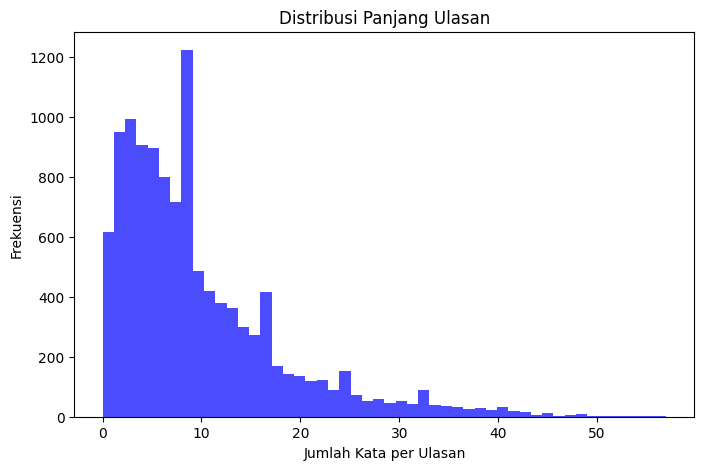

In [26]:
import matplotlib.pyplot as plt
df_negatif_nodup["text_length"] = df_negatif_nodup["stop_word"].apply(len)  # Hitung jumlah kata

# Plot distribusi panjang dokumen
plt.figure(figsize=(8, 5))
plt.hist(df_negatif_nodup["text_length"], bins=50, color="blue", alpha=0.7)
plt.xlabel("Jumlah Kata per Ulasan")
plt.ylabel("Frekuensi")
plt.title("Distribusi Panjang Ulasan")
plt.show()

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_6944\2531265716.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette="Blues_r")


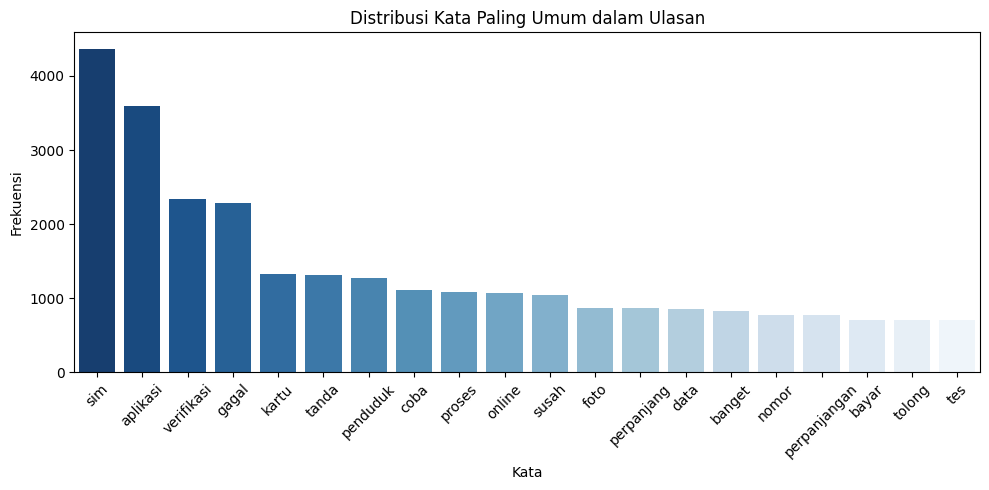

In [27]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Gabungkan semua kata dari list di kolom 'stop_word'
all_words = [word for tokens in df_negatif_nodup["stop_word"] for word in tokens]

# Hitung frekuensi kata
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)  # Ambil 20 kata paling sering muncul

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("Distribusi Kata Paling Umum dalam Ulasan")
plt.tight_layout()
plt.show()



Membuat bigram dan trigram

In [28]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [29]:
# Membuat bigram
bigram = Phrases(df_negatif_nodup['stop_word'], min_count=2, threshold=10)  # min_count: frekuensi minimum bigram
bigram_mod = Phraser(bigram)

# Menerapkan bigram pada dokumen
processed_docs_bigram = [bigram_mod[doc] for doc in df_negatif_nodup['stop_word']]

# Melihat hasil preprocessing
print(processed_docs_bigram)

[['proses', 'data', 'dikirim', 'validasi', 'data', 'data', 'pembayaran', 'namanya', 'perampokan', 'anggap', 'gagal', 'rugi_puluh', 'ribu', 'pakai', 'bank_bank', 'negara_indonesia', 'bank', 'rugi', 'ribu'], ['aplikasinya', 'sihkok', 'sim', 'tulisannya', 'layanan', 'tersedialayanan', 'pilih', 'pengembangan', 'bagus', 'aplikasi', 'memudahkanini', 'sih'], ['aplikasi', 'payah', 'duit', 'dibayar', 'muncul_notifikasi', 'ditolak_alasan', 'foto', 'kartu_tanda', 'penduduk', 'sim', 'jelas', 'uplod', 'foto', 'gb', 'jelas', 'duit', 'pengembalian_dipotong', 'ahhhhh', 'diverifikasi', 'bayar', 'sesuai', 'suruh', 'bayar', 'diverifikasi', 'suruh', 'bayar', 'rugi', 'giliran', 'diterbitkan', 'muncul', 'alasan', 'foto', 'jelas', 'tertawa'], ['verifikasi', 'gagal'], ['sampah'], ['sumber_daya', 'manusia', 'kompeten', 'menangani', 'sim', 'online', 'wajib', 'sim', 'perpanjang', 'dipersulit', 'data', 'jelas', 'sesuai', 'sim', 'kartu_tanda', 'penduduk', 'foto', 'blur', 'blur', 'kaya', 'berbayang', 'kaya', 'cetak

In [30]:
from gensim import corpora, models

# Membuat dictionary dan corpus
dictionary = corpora.Dictionary(processed_docs_bigram)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs_bigram]

In [31]:
# from gensim.models import CoherenceModel
# import matplotlib.pyplot as plt

# # Fungsi untuk menghitung coherence score untuk berbagai jumlah topik
# def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
#     coherence_values = []
#     model_list = []
#     for num_topics in range(start, limit, step):
#         model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15)
#         model_list.append(model)
#         coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
#         coherence_values.append(coherence_model.get_coherence())
#     return model_list, coherence_values

# # Menentukan parameter
# start = 2
# limit = 15
# step = 1

# # Hitung coherence score
# model_list, coherence_values = compute_coherence_values(
#     dictionary=dictionary, corpus=corpus, texts=processed_docs_bigram,
#     start=start, limit=limit, step=step
# )

# # Plot coherence score
# x = range(start, limit, step)
# plt.plot(x, coherence_values)
# plt.xlabel("Jumlah Topik")
# plt.ylabel("Coherence Score")
# plt.title("Elbow Method untuk Menentukan Jumlah Topik Optimal")
# plt.show()


In [32]:
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt

model_dict = {}
coherence_dict = {}
umass_dict = {}

for num_topics in range(2, 11):
    # Membuat model LDA
    model = LdaModel(
        corpus=corpus, id2word=dictionary,
        num_topics=num_topics, passes=15, random_state=42
    )
    
    # Menghitung koherensi c_v
    coherence_model = CoherenceModel(model=model, texts=processed_docs_bigram,
                                     dictionary=dictionary, coherence='c_v')
    # Menghitung koherensi u_mass
    umass_model = CoherenceModel(model=model, texts=processed_docs_bigram,
                                 dictionary=dictionary, coherence='u_mass')
    
    # Menyimpan model dan koherensi
    model_dict[num_topics] = model
    coherence_dict[num_topics] = coherence_model.get_coherence()
    umass_dict[num_topics] = umass_model.get_coherence()

# Menampilkan hasil koherensi
print("Koherensi c_v:", coherence_dict)
print("Koherensi u_mass:", umass_dict)


Koherensi c_v: {2: 0.39066579606866214, 3: 0.3923656118232248, 4: 0.43436299333862205, 5: 0.39860556347164394, 6: 0.4117465319299907, 7: 0.4417300818219105, 8: 0.39489278877046907, 9: 0.43489395756508914, 10: 0.41103604585731324}
Koherensi u_mass: {2: -3.251409436300346, 3: -3.353787182975419, 4: -3.655082107050988, 5: -4.531844810022475, 6: -4.315586304829945, 7: -3.968570586869426, 8: -5.371656553633054, 9: -4.888519349138916, 10: -5.743718130134489}


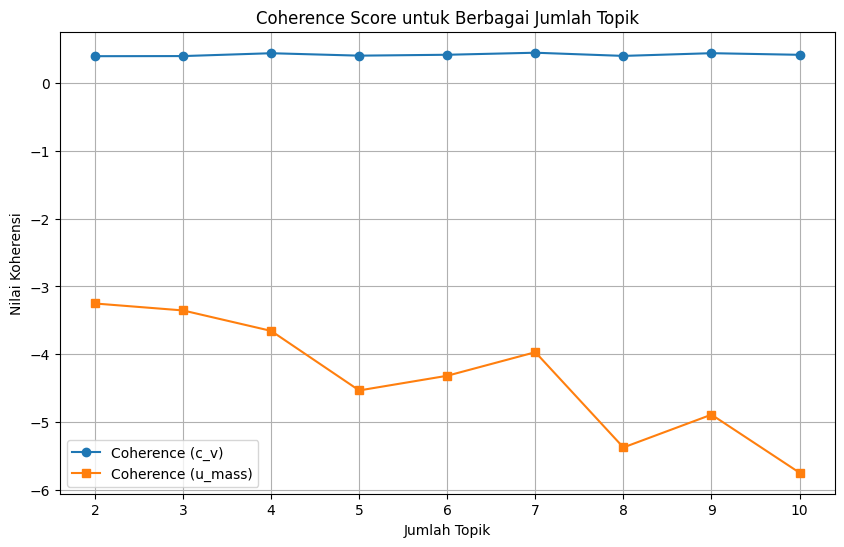

In [33]:
import matplotlib.pyplot as plt

# Siapkan data untuk plotting
topics_range = list(coherence_dict.keys())
coherence_values = list(coherence_dict.values())
umass_values = list(umass_dict.values())

# Buat plot
plt.figure(figsize=(10, 6))
plt.plot(topics_range, coherence_values, marker='o', label='Coherence (c_v)')
plt.plot(topics_range, umass_values, marker='s', label='Coherence (u_mass)')
plt.title('Coherence Score untuk Berbagai Jumlah Topik')
plt.xlabel('Jumlah Topik')
plt.ylabel('Nilai Koherensi')
plt.legend()
plt.grid(True)
plt.xticks(topics_range)
plt.show()


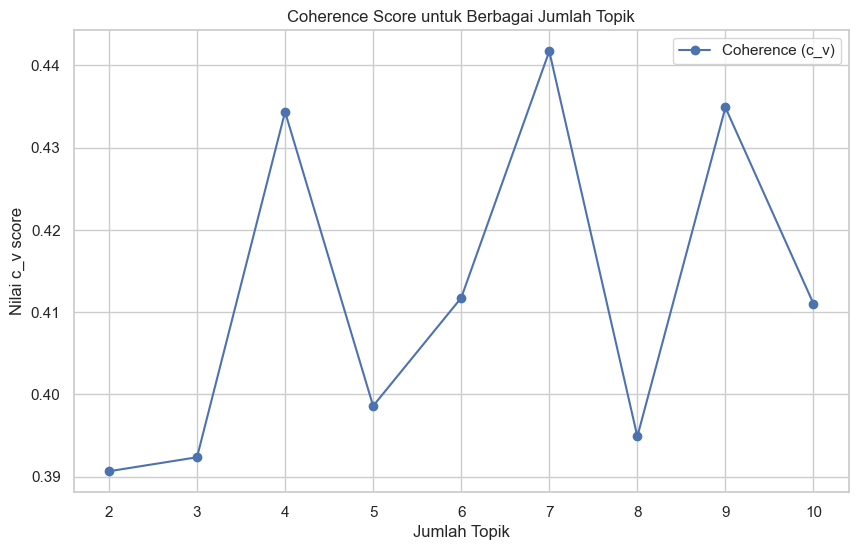

In [39]:
import matplotlib.pyplot as plt

# Siapkan data untuk plotting
topics_range = list(coherence_dict.keys())
coherence_values = list(coherence_dict.values())
umass_values = list(umass_dict.values())

# Buat plot
plt.figure(figsize=(10, 6))
plt.plot(topics_range, coherence_values, marker='o', label='Coherence (c_v)')
# plt.plot(topics_range, umass_values, marker='s', label='Coherence (u_mass)')
plt.title('Coherence Score untuk Berbagai Jumlah Topik')
plt.xlabel('Jumlah Topik')
plt.ylabel('Nilai c_v score')
plt.legend()
plt.grid(True)
plt.xticks(topics_range)
plt.show()


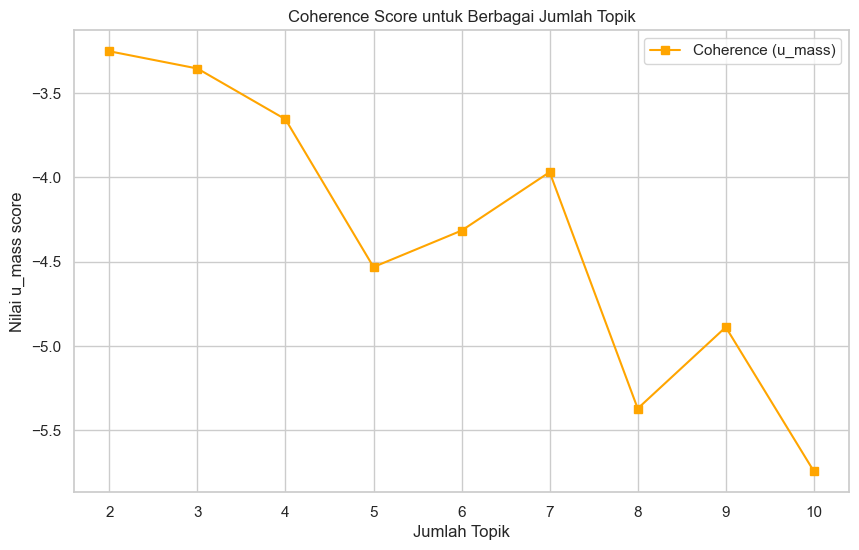

In [40]:
import matplotlib.pyplot as plt

# Siapkan data untuk plotting
topics_range = list(coherence_dict.keys())
coherence_values = list(coherence_dict.values())
umass_values = list(umass_dict.values())

# Buat plot
plt.figure(figsize=(10, 6))
# plt.plot(topics_range, coherence_values, marker='o', label='Coherence (c_v)')
plt.plot(topics_range, umass_values, marker='s', label='Coherence (u_mass)', color='orange')
plt.title('Coherence Score untuk Berbagai Jumlah Topik')
plt.xlabel('Jumlah Topik')
plt.ylabel('Nilai u_mass score')
plt.legend()
plt.grid(True)
plt.xticks(topics_range)
plt.show()


In [35]:
best_num_topics = max(coherence_dict, key=coherence_dict.get)
best_model = model_dict[best_num_topics]

print(f"Jumlah topik optimal: {best_num_topics}")
for idx, topic in best_model.print_topics(-1):
    print(f"Topik {idx}: {topic}")


Jumlah topik optimal: 7
Topik 0: 0.021*"min" + 0.014*"pembaruan" + 0.011*"sim" + 0.011*"perbaikan" + 0.009*"bagus" + 0.009*"kesalahan" + 0.009*"satpas" + 0.008*"mohon" + 0.008*"aplikasi" + 0.007*"masukan_nomor"
Topik 1: 0.109*"aplikasi" + 0.032*"sim" + 0.016*"aplikasinya" + 0.012*"unduh" + 0.012*"jelas" + 0.012*"layanan_tersedia" + 0.011*"layanan" + 0.010*"online" + 0.010*"pengembangan" + 0.009*"ribet"
Topik 2: 0.052*"sim" + 0.022*"online" + 0.021*"aplikasi" + 0.017*"data" + 0.010*"tes_kesehatan" + 0.009*"satpas" + 0.009*"foto" + 0.008*"bayar" + 0.008*"pas" + 0.008*"unggah"
Topik 3: 0.070*"kartu_tanda" + 0.069*"penduduk" + 0.037*"gagal" + 0.035*"verifikasi_elektonik" + 0.024*"susah_banget" + 0.020*"foto" + 0.015*"susah" + 0.011*"verifikasi_e" + 0.011*"banget" + 0.009*"nomor_telepon"
Topik 4: 0.049*"proses" + 0.035*"sim" + 0.024*"coba" + 0.020*"perpanjang_sim" + 0.016*"bayar" + 0.016*"online" + 0.015*"perpanjangan_sim" + 0.013*"pembayaran" + 0.011*"ditolak" + 0.011*"prosesnya"
Topik 5: 

In [50]:
# ...existing code...
threshold = 0.07  # atur threshold sesuai kebutuhan
print(f"Jumlah topik optimal: {best_num_topics}")
for idx in range(best_model.num_topics):
    topic_terms = best_model.get_topic_terms(idx, topn=20)  # ambil top 20 kata
    filtered_terms = [(best_model.id2word[word_id], prob) for word_id, prob in topic_terms if prob > threshold]
    if filtered_terms:
        print(f"Topik {idx}:")
        for word, prob in filtered_terms:
            print(f"  {word}: {prob:.3f}")
    else:
        print(f"Topik {idx}: (tidak ada kata dengan probabilitas > {threshold})")
# ...existing code...

Jumlah topik optimal: 7
Topik 0: (tidak ada kata dengan probabilitas > 0.07)
Topik 1:
  aplikasi: 0.109
Topik 2: (tidak ada kata dengan probabilitas > 0.07)
Topik 3: (tidak ada kata dengan probabilitas > 0.07)
Topik 4: (tidak ada kata dengan probabilitas > 0.07)
Topik 5: (tidak ada kata dengan probabilitas > 0.07)
Topik 6:
  gagal: 0.124


In [44]:
# Threshold probabilitas topik
threshold = 0.20  # misalnya hanya tampilkan topik dengan probabilitas ≥ 20%

# Dapatkan distribusi topik untuk setiap dokumen
for i, bow in enumerate(corpus):
    doc_topics = best_model.get_document_topics(bow)
    print(f"\nDokumen {i+1}:")
    for topic_num, prob in doc_topics:
        if prob >= threshold:
            print(f"  Topik {topic_num} dengan probabilitas {prob:.3f}")



Dokumen 1:
  Topik 2 dengan probabilitas 0.583

Dokumen 2:
  Topik 1 dengan probabilitas 0.546
  Topik 6 dengan probabilitas 0.399

Dokumen 3:
  Topik 1 dengan probabilitas 0.258
  Topik 3 dengan probabilitas 0.264
  Topik 4 dengan probabilitas 0.397

Dokumen 4:
  Topik 6 dengan probabilitas 0.714

Dokumen 5:
  Topik 1 dengan probabilitas 0.571

Dokumen 6:
  Topik 2 dengan probabilitas 0.353
  Topik 3 dengan probabilitas 0.293
  Topik 4 dengan probabilitas 0.286

Dokumen 7:
  Topik 1 dengan probabilitas 0.571

Dokumen 8:
  Topik 1 dengan probabilitas 0.714

Dokumen 9:
  Topik 1 dengan probabilitas 0.785

Dokumen 10:
  Topik 1 dengan probabilitas 0.757

Dokumen 11:
  Topik 4 dengan probabilitas 0.571

Dokumen 12:
  Topik 0 dengan probabilitas 0.482
  Topik 3 dengan probabilitas 0.339

Dokumen 13:
  Topik 1 dengan probabilitas 0.970

Dokumen 14:
  Topik 1 dengan probabilitas 0.359
  Topik 4 dengan probabilitas 0.403

Dokumen 15:
  Topik 2 dengan probabilitas 0.339
  Topik 4 dengan proba

In [36]:
import pandas as pd

# Ambil distribusi topik untuk setiap dokumen
data = []

for i, doc in enumerate(corpus[:7]):  # Hanya dokumen 0 sampai 6
    topic_dist = best_model.get_document_topics(doc, minimum_probability=0)
    row = [i]  # Doc ID
    probs = [0.0] * optimal_topics
    
    for topic_num, prob in topic_dist:
        probs[topic_num] = prob

    top_topic = probs.index(max(probs))  # Topik dengan probabilitas tertinggi
    row.append(f"Topik {top_topic}")
    row.extend(probs)
    data.append(row)

# Buat DataFrame
columns = ['Doc ID', 'Topik Dominan'] + [f'Topik {i}' for i in range(optimal_topics)]
df = pd.DataFrame(data, columns=columns)

print(df)


NameError: name 'optimal_topics' is not defined

# Visualisasi Hasil

In [41]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # untuk gensim > 4
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Ambil model terbaik dari iterasi sebelumnya
optimal_num_topics = max(coherence_dict, key=coherence_dict.get)
lda_best_model = model_dict[optimal_num_topics]

# Siapkan visualisasi
vis_data = gensimvis.prepare(lda_best_model, corpus, dictionary)

# Tampilkan
pyLDAvis.display(vis_data)


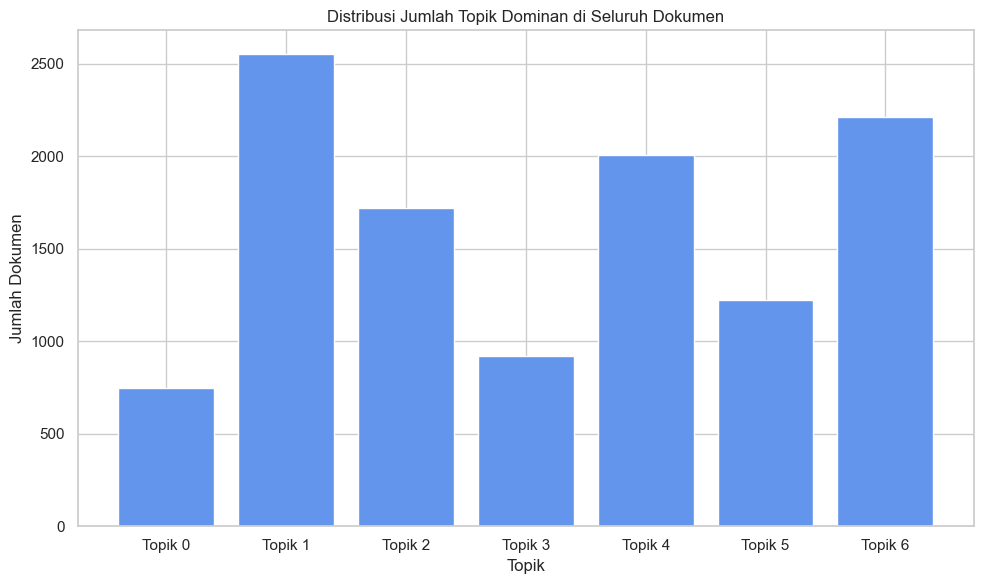

In [42]:
import matplotlib.pyplot as plt

# Gunakan model terbaik dari iterasi
optimal_num_topics = max(coherence_dict, key=coherence_dict.get)
lda_best_model = model_dict[optimal_num_topics]

# Inisialisasi penghitung untuk tiap topik
topic_counts = [0] * optimal_num_topics

# Iterasi setiap dokumen dan ambil topik dengan probabilitas tertinggi
for doc in corpus:
    topic_distribution = lda_best_model.get_document_topics(doc)
    top_topic = max(topic_distribution, key=lambda x: x[1])[0]
    topic_counts[top_topic] += 1

# Plot diagram batang
plt.figure(figsize=(10, 6))
plt.bar(range(optimal_num_topics), topic_counts, color='cornflowerblue')
plt.xlabel('Topik')
plt.ylabel('Jumlah Dokumen')
plt.title('Distribusi Jumlah Topik Dominan di Seluruh Dokumen')
plt.xticks(range(optimal_num_topics), [f'Topik {i}' for i in range(optimal_num_topics)])
plt.tight_layout()
plt.show()

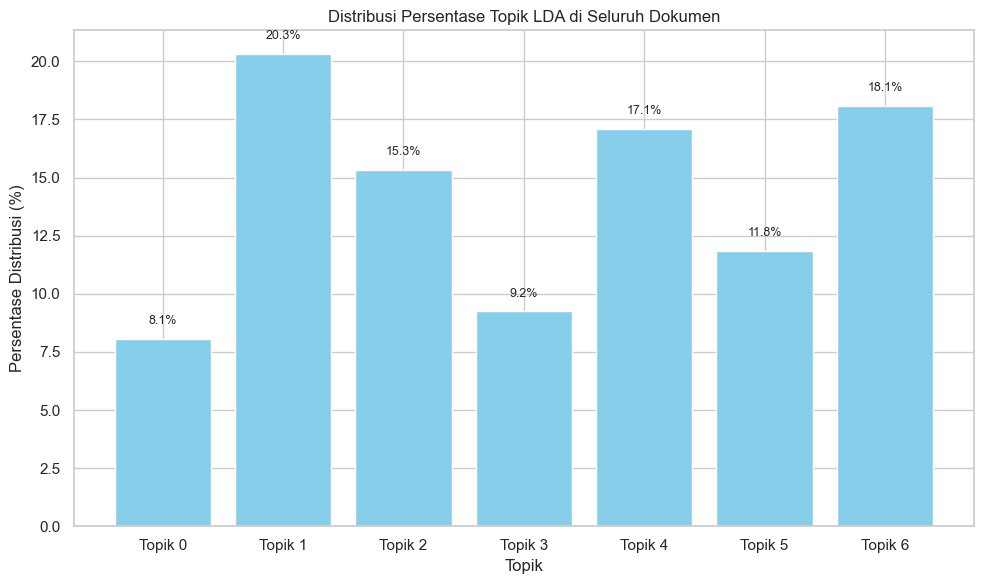

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil jumlah topik dari model terbaik
optimal_topics = lda_best_model.num_topics

# Hitung jumlah kemunculan tiap topik (dengan bobot probabilitas)
topic_counts = [0] * optimal_topics

for doc in corpus:
    topic_distribution = lda_best_model.get_document_topics(doc)
    for topic_num, prob in topic_distribution:
        topic_counts[topic_num] += prob  # akumulasi probabilitas

# Normalisasi ke persentase
total = sum(topic_counts)
topic_distribution_percent = np.array(topic_counts) / total * 100

# Plot diagram batang
plt.figure(figsize=(10, 6))
bars = plt.bar(range(optimal_topics), topic_distribution_percent, color='skyblue')
plt.xlabel('Topik')
plt.ylabel('Persentase Distribusi (%)')
plt.title('Distribusi Persentase Topik LDA di Seluruh Dokumen')
plt.xticks(range(optimal_topics), [f'Topik {i}' for i in range(optimal_topics)])

# Tambahkan label persentase di atas setiap batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}%', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# menyimpan hasil

In [ ]:
seed_topic_dict = {
    "Masukan dan Perbaikan Aplikasi": [],
    "Penggunaan Aplikasi SIM": [],
    "Proses Pendaftaran dan Verifikasi SIM" : [],
    "Verifikasi Kartu Tanda Penduduk (KTP)" : [],
    "Proses Perpanjangan SIM" : [],
    "Masuk dan Login ke Aplikasi" : []
}#disesuaikan dengan format data input library matplotlib, MAX hnaya 6 aspek dan masing2 ada max 6 sub topik

In [ ]:
# Mengisi dictionary dengan top-kata dari tiap topik
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    seed_topic_dict[list(seed_topic_dict.keys())[i]] = list(topic_words)